<a href="https://colab.research.google.com/github/Shrutiba/iisc_cds/blob/main/M2_NB_MiniProject_5_Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

## Grading = 10 Points

### Import Required packages

In [48]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy import stats

## Data Wrangling

In [49]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

replace Online_Retail_Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Load the data

In [50]:
# YOUR CODE HERE
df = pd.read_csv('Online_Retail_Train.csv', encoding = 'unicode_escape')
# Change the data type of CustomerID to object as it is categorical variable
df['CustomerID'] = df['CustomerID'].astype(str)
# Replace empty strings and 'nan' strings with actual NaN
df['CustomerID'] = df['CustomerID'].replace({'': np.nan, 'nan': np.nan})


In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [52]:
df_test = pd.read_csv('Online_Retail_Test.csv', encoding = 'unicode_escape')
# Change the data type of CustomerID to object as it is categorical variable
df_test['CustomerID'] = df_test['CustomerID'].astype(str)
# Replace empty strings and 'nan' strings with actual NaN
df_test['CustomerID'] = df_test['CustomerID'].replace({'': np.nan, 'nan': np.nan})

In [53]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  object 
 7   Country      514813 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 31.4+ MB


## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://thecleverprogrammer.com/2023/07/26/detect-and-remove-outliers-using-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [55]:
def get_duplicate_row_count(data):
    invoice_count = data.groupby(['InvoiceNo','StockCode']).size().reset_index(name='count')
    return invoice_count['count'].value_counts()

In [56]:
def getRowCountWithNoCustomerID(data):
    return len(data[data['CustomerID'].isnull()])

In [57]:
def getRowCountWithStockCodeS(data):
    return ((data['StockCode'] == 'S') & (data['CustomerID'] != 'nan')).sum()

In [58]:
def getRowCountWithIrrelevantStockCode(data):
    return data['StockCode'].isin(['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES','D','CRUK']).sum()

In [59]:
def getRowsWithQuantityOutliers(data, threshold = 2):
    z_scores = np.abs(stats.zscore(data['Quantity']))
    # Filter the data based on z-score threshold
    return data[z_scores > threshold]

In [60]:
def getRowsWithUnitPriceOutliers(data, threshold = 2):
    z_scores = np.abs(stats.zscore(data['UnitPrice']))
    # Filter the data based on z-score threshold
    return data[z_scores > threshold]

In [61]:
def data_preprocessing(data):

# Drop duplicates by comparing all the fields
    data.drop_duplicates(inplace=True)
    data.drop(data[data['CustomerID'].isnull()].index, inplace=True)

    rows = data[data['StockCode'].isin(['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES','D','CRUK'])]
    data.drop((rows).index, inplace=True)

# As the no. of outliers is very small, I decided to remove the rows with outliers
    outlier_index_quantity = getRowsWithQuantityOutliers(data).index
    data.drop(outlier_index_quantity, inplace=True)

    outlier_index_unitprice = getRowsWithUnitPriceOutliers(data).index
    data.drop(outlier_index_unitprice, inplace=True)

# Add DayOfWeek Column
    # Convert 'InvoiceDate' to datetime objects
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

    # Create the 'DayOfWeek' column
    data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()


In [62]:
def boxplot_preprocessing(original_quantity_range,original_unitprice_range,df):

    # Box plot for Quantity
    plt.figure(figsize=(5, 4))  # Adjust figure size if needed
    sns.boxplot(x=df['Quantity'])
    plt.title('Box Plot of Quantity Before Preprocessing')
    plt.xlabel('Quantity')
    plt.xlim(original_quantity_range)
    plt.show()

    # Box plot for UnitPrice
    plt.figure(figsize=(5, 4))  # Adjust figure size if needed
    sns.boxplot(x=df['UnitPrice'])
    plt.title('Box Plot of UnitPrice Before Preprocessing')
    plt.xlabel('UnitPrice')
    plt.xlim(original_unitprice_range)
    plt.show()

In [63]:
def before_preprocessing(df):
    print("BEFORE PREPROCESSING")
    print(f"No. of duplicate rows with count: {get_duplicate_row_count(df)}")
    print(f"No. of rows with no customer ID: {getRowCountWithNoCustomerID(df)}")
    print(f"No. of rows with Sample StockCode and customer ID is not null: {getRowCountWithStockCodeS(df)}")
    print(f"No. of rows with irrelevant StockCodes: {getRowCountWithIrrelevantStockCode(df)}")
    print(f"Z Score of Quantity: {getRowsWithQuantityOutliers(df)['Quantity'].count()}")
    print(f"Z Score of UnitPrice: {getRowsWithUnitPriceOutliers(df)['UnitPrice'].count()}")

In [64]:
def after_preprocessing(df):

    print("AFTER PREPROCESSING")
    print(f"No. of duplicate rows with count: {get_duplicate_row_count(df)}")
    print(f"No. of rows with no customer ID: {getRowCountWithNoCustomerID(df)}")
    print(f"No. of rows with Sample StockCode and customer ID is not null: {getRowCountWithStockCodeS(df)}")
    print(f"No. of rows with irrelevant StockCodes: {getRowCountWithIrrelevantStockCode(df)}")


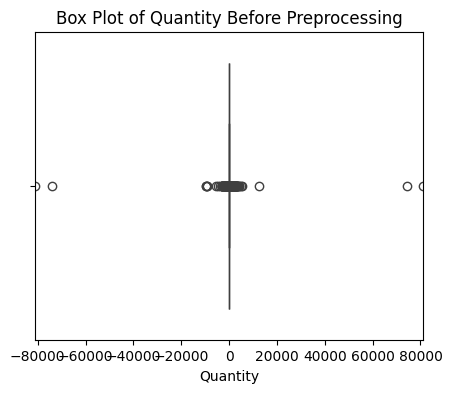

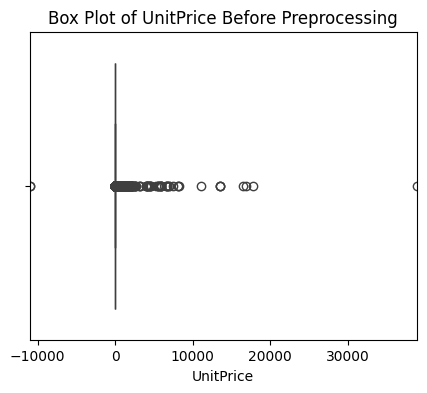

BEFORE PREPROCESSING
No. of duplicate rows with count: count
1     496374
2       8102
3        581
4         76
5         16
6          6
7          4
9          1
19         1
16         1
Name: count, dtype: int64
No. of rows with no customer ID: 128263
No. of rows with Sample StockCode and customer ID is not null: 62
No. of rows with irrelevant StockCodes: 2675
Z Score of Quantity: 637
Z Score of UnitPrice: 551
AFTER PREPROCESSING
No. of duplicate rows with count: count
1    362759
2      4092
3       131
4         6
Name: count, dtype: int64
No. of rows with no customer ID: 0
No. of rows with Sample StockCode and customer ID is not null: 0
No. of rows with irrelevant StockCodes: 0


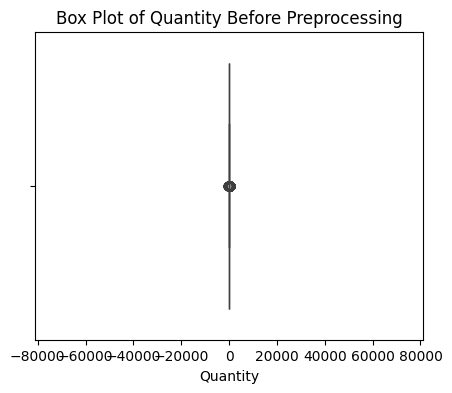

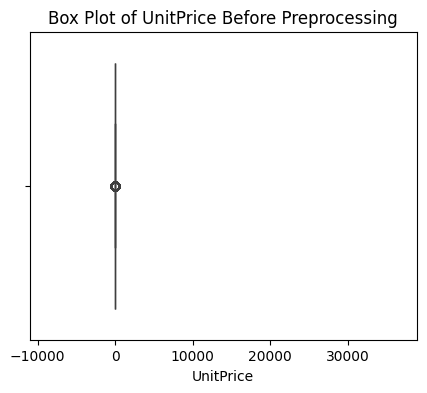

In [65]:
# Process Training Data
original_quantity_range = (df['Quantity'].min(), df['Quantity'].max())
original_unitprice_range = (df['UnitPrice'].min(), df['UnitPrice'].max())

boxplot_preprocessing(original_quantity_range,original_unitprice_range,df)
before_preprocessing(df)
data_preprocessing(df)
after_preprocessing(df)
boxplot_preprocessing(original_quantity_range,original_unitprice_range,df)

In [66]:
df.shape

(371360, 9)

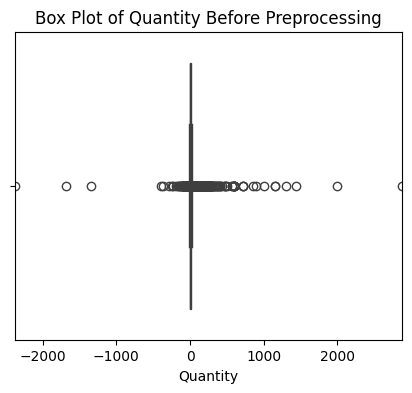

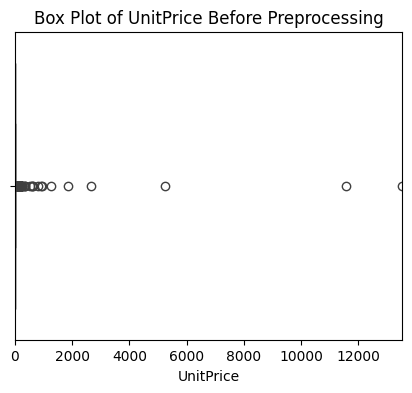

BEFORE PREPROCESSING
No. of duplicate rows with count: count
1    27047
2       23
3        1
Name: count, dtype: int64
No. of rows with no customer ID: 6817
No. of rows with Sample StockCode and customer ID is not null: 1
No. of rows with irrelevant StockCodes: 140
Z Score of Quantity: 433
Z Score of UnitPrice: 18
AFTER PREPROCESSING
No. of duplicate rows with count: count
1    18991
2        8
Name: count, dtype: int64
No. of rows with no customer ID: 0
No. of rows with Sample StockCode and customer ID is not null: 0
No. of rows with irrelevant StockCodes: 0


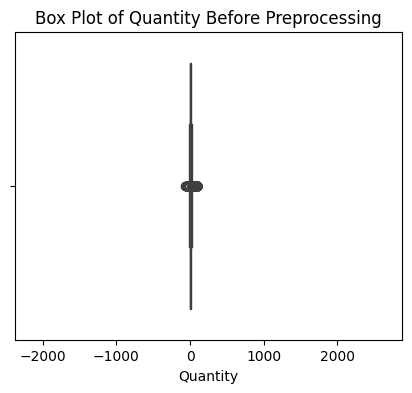

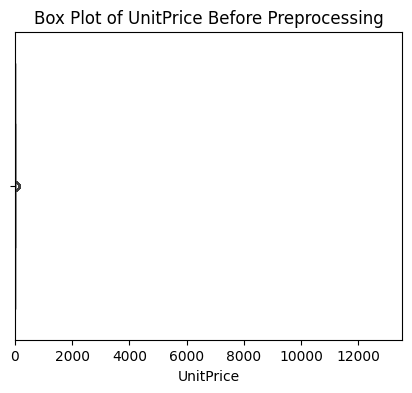

In [67]:
# Process Test Data
original_quantity_range_test = (df_test['Quantity'].min(), df_test['Quantity'].max())
original_unitprice_range_test = (df_test['UnitPrice'].min(), df_test['UnitPrice'].max())

boxplot_preprocessing(original_quantity_range_test,original_unitprice_range_test,df_test)
before_preprocessing(df_test)
data_preprocessing(df_test)
after_preprocessing(df_test)
boxplot_preprocessing(original_quantity_range_test,original_unitprice_range_test,df_test)

In [92]:
df_test.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,TotalAmount
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,Wednesday,20.4
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,Friday,27.8


## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [69]:
# YOUR CODE HERE
# Check Free Items in the Data
print(len(df[df['UnitPrice'] == 0]))
#Answer : Yes

30


In [70]:
#Transactions per Country
transactions_per_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
transactions_per_country

,InvoiceNo
Country,
United Kingdom,19082
Germany,571
France,427
EIRE,307
Belgium,115
Spain,99
Netherlands,92
Australia,67
Switzerland,65


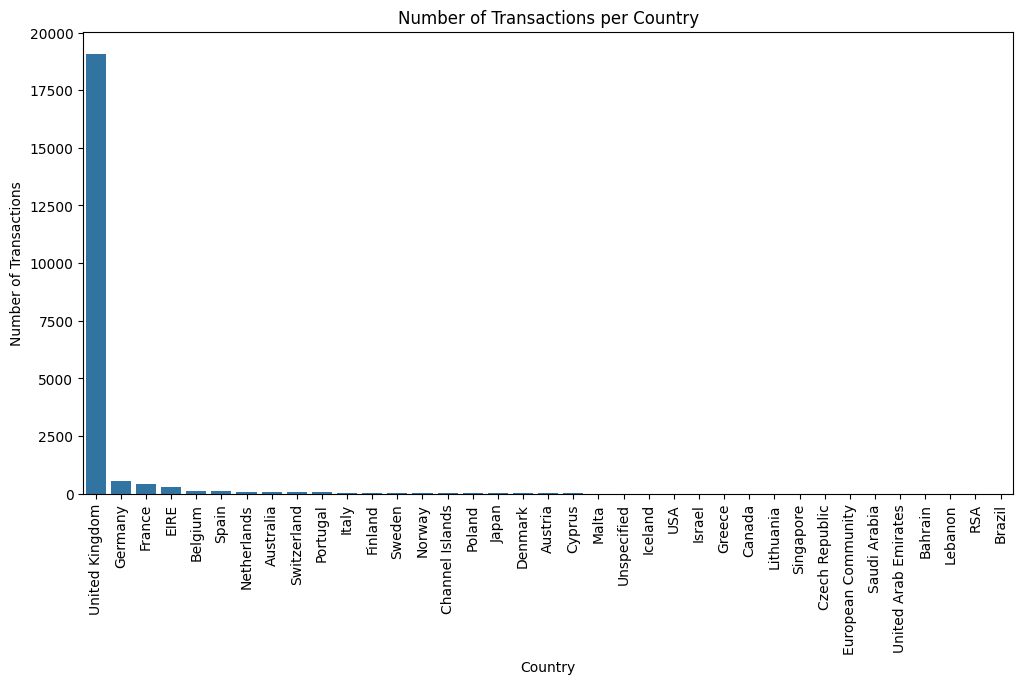

In [71]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=transactions_per_country.index, y=transactions_per_country.values)
plt.title('Number of Transactions per Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#Answer : Mostly Data is from UK. Data is Skewed w.r.t country

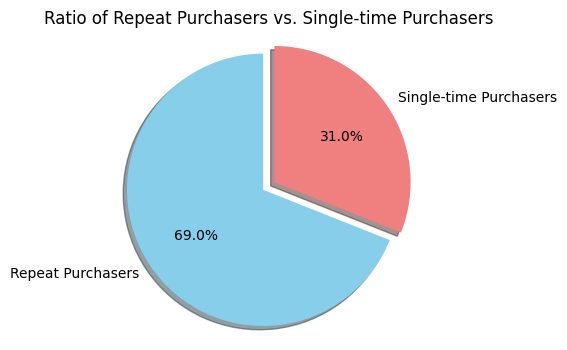

In [72]:
# Repeat purchase vs Single Time Purchase
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_purchase = purchase_frequency[purchase_frequency > 1].count()
single_time_purchase = purchase_frequency[purchase_frequency == 1].count()

total_customer = repeat_purchase + single_time_purchase
repeat_ratio = repeat_purchase / total_customer
single_time_ratio = single_time_purchase / total_customer

# Visualize using a pie chart
labels = ['Repeat Purchasers', 'Single-time Purchasers']
sizes = [repeat_ratio, single_time_ratio]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice (Repeat Purchasers)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Ratio of Repeat Purchasers vs. Single-time Purchasers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371360 entries, 0 to 514812
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    371360 non-null  object        
 1   StockCode    371360 non-null  object        
 2   Description  371360 non-null  object        
 3   Quantity     371360 non-null  int64         
 4   InvoiceDate  371360 non-null  datetime64[ns]
 5   UnitPrice    371360 non-null  float64       
 6   CustomerID   371360 non-null  object        
 7   Country      371360 non-null  object        
 8   DayOfWeek    371360 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 28.3+ MB


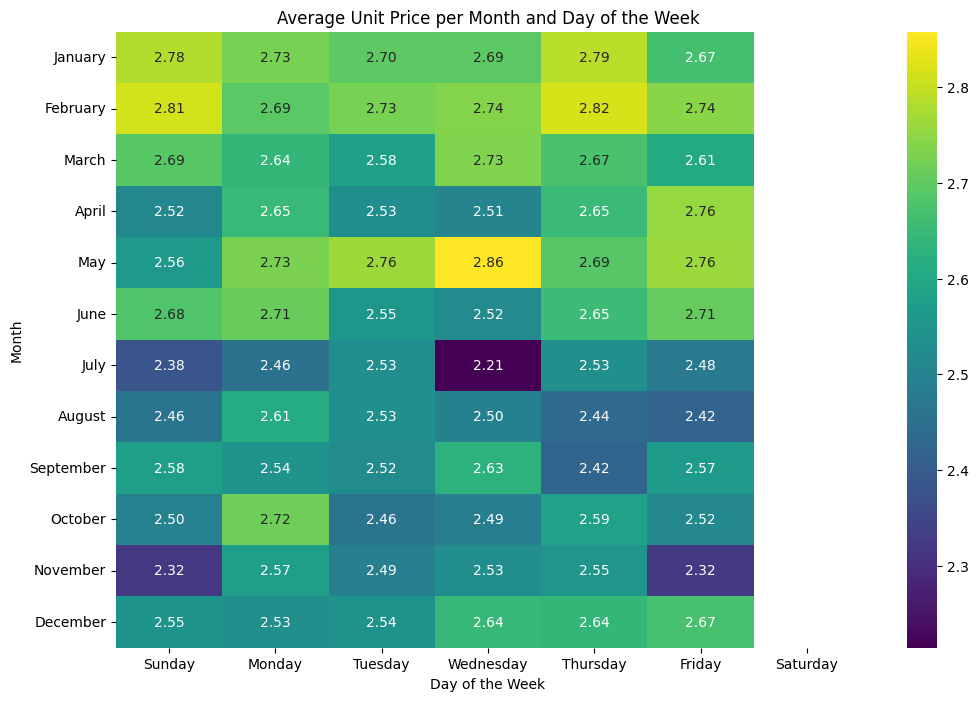

In [93]:
df['Month'] = df['InvoiceDate'].dt.month_name()
df_test['Month'] = df_test['InvoiceDate'].dt.month_name()

heatmap_data = df.pivot_table(values ='UnitPrice', index='Month', columns='DayOfWeek', aggfunc='mean')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data.reindex(month_order)

week_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
heatmap_data = heatmap_data.reindex(columns=week_order)


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f")
plt.title('Average Unit Price per Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()

In [75]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,Month
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom,Tuesday,November
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,Sunday,May
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,Monday,November


In [76]:
# Find the top 10 customers who bought the most no.of items.

purchase_items = df.groupby('CustomerID')['StockCode'].nunique()
purchase_items = purchase_items.sort_values(ascending=False)
print(purchase_items.head(10))


CustomerID
14911.0    1706
12748.0    1693
17841.0    1278
14096.0    1004
14298.0     850
14606.0     792
14769.0     683
14646.0     668
14156.0     664
13089.0     605
Name: StockCode, dtype: int64


In [77]:

purchase_items = df.groupby('CustomerID')['Quantity'].sum()
purchase_items = purchase_items.sort_values(ascending=False)
print(purchase_items.head(10))

CustomerID
14646.0    173671
14911.0     71515
12415.0     67148
17511.0     58973
18102.0     55413
14298.0     53424
13694.0     52488
14156.0     50645
16684.0     37549
17450.0     35939
Name: Quantity, dtype: int64


In [78]:
#Also find the top 10 Items bought by most no.of customers
top_items_bought = df.groupby('StockCode')['CustomerID'].nunique().reset_index(name='Count')

top_items_bought = top_items_bought.merge(df[['StockCode', 'Description']].drop_duplicates(), on='StockCode', how='left')

top_items_bought = top_items_bought.sort_values(by='Count',ascending=False)
top_items_bought = top_items_bought[['StockCode', 'Description', 'Count']]

print(top_items_bought.head(10))


     StockCode                         Description  Count
3390    85123A  CREAM HANGING HEART T-LIGHT HOLDER    826
3389    85123A  WHITE HANGING HEART T-LIGHT HOLDER    826
2740     47566                       PARTY BUNTING    685
3211     84879       ASSORTED COLOUR BIRD ORNAMENT    653
3375    85099B             JUMBO BAG RED RETROSPOT    620
1586     22720   SET OF 3 CAKE TINS PANTRY DESIGN     618
430      21212     PACK OF 72 RETROSPOT CAKE CASES    616
986      22086     PAPER CHAIN KIT 50'S CHRISTMAS     592
1336     22457     NATURAL SLATE HEART CHALKBOARD     571
1039     22138       BAKING SET 9 PIECE RETROSPOT     568


## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [79]:
df1 = df.copy()
df1['TotalAmount'] = df1['Quantity'] * df1['UnitPrice']
transaction_value_per_Invoice = df1.groupby(['CustomerID','InvoiceNo'])['TotalAmount'].sum()
transaction_value_per_Invoice.groupby('CustomerID').transform('max')

CustomerID  InvoiceNo
12347.0     537626       1170.42
            542237       1170.42
            549222       1170.42
            556201       1170.42
            562032       1170.42
                          ...   
18283.0     579673        297.56
            580872        297.56
18287.0     554065        988.72
            570715        988.72
            573167        988.72
Name: TotalAmount, Length: 21246, dtype: float64

In [102]:
def feature_engineering_transformation(data):

  # Create TotalAmount column
  data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

  # Group by CustomerID and aggregate relevant columns
  customer_data = data.groupby('CustomerID').agg({
      'TotalAmount': 'sum',
      'InvoiceNo': 'nunique',  # Number of unique invoices
      'StockCode': 'nunique',
      'Quantity': 'sum',
      'Country': 'first',  # Keep the country information
      'Month': lambda x: x.value_counts().index[0], # Month shopped most
      'DayOfWeek': lambda x: x.value_counts().index[0], # Day of week shopped most
  })

  # Rename columns for clarity
  customer_data.rename(columns={
      'InvoiceNo': 'TransactionCount',
      'StockCode': 'UniqueProductsPurchased',
      'Quantity': 'TotalQuantity',
      'Month': 'MostShoppedMonth',
      'DayOfWeek': 'MostShoppedDayOfTheWeek',
  }, inplace=True)

  '''customer_data['AverageQuantityPerProduct'] = customer_data['TotalQuantity']/customer_data['UniqueProductsPurchased']

  reference_date = data['InvoiceDate'].max()
  last_purchase_dates = data.groupby('CustomerID')['InvoiceDate'].max()

  customer_data['DaysSinceLastPurchase'] = (reference_date - last_purchase_dates).dt.days

  returns = data[data['Quantity'] < 0].groupby('CustomerID')['InvoiceNo'].nunique()

  customer_data['Returns'] = returns.fillna(0)

  cancelled_orders = data[data['InvoiceNo'].str.startswith('C,', na=False)].groupby('CustomerID')['InvoiceNo'].nunique()

  customer_data['cancelled_orders'] = cancelled_orders.fillna(0)

  transaction_value_per_Invoice = data.groupby(['CustomerID','InvoiceNo'])['TotalAmount'].sum()

  customer_data['MaxTransactionValue'] = transaction_value_per_Invoice.groupby('CustomerID').transform('max')

  customer_data['MinTransactionValue'] = transaction_value_per_Invoice.groupby('CustomerID').transform('min')

  customer_data['MeanTransactionValue'] = transaction_value_per_Invoice.groupby('CustomerID').transform('mean')

  customer_data = pd.get_dummies(customer_data, columns=['MostShoppedMonth','MostShoppedDayOfTheWeek','Country'], drop_first=True)'''


  return customer_data



In [112]:
def feature_engineering_transformation2(data):

  # Create TotalAmount column
  data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

  # Group by CustomerID and aggregate relevant columns
  customer_data = data.groupby('CustomerID').agg({
      'TotalAmount': 'sum',
      'InvoiceNo': 'nunique',  # Number of unique invoices
      'Quantity': 'sum',
      'Country': 'first',  # Keep the country information
  })

  # Rename columns for clarity
  customer_data.rename(columns={
      'InvoiceNo': 'TransactionCount',
      'Quantity': 'TotalQuantity',
  }, inplace=True)

  return customer_data

In [113]:
# Apply the function to the training data
processed_train_df = feature_engineering_transformation2(df)



In [114]:
processed_train_df.head(2)

,TotalAmount,TransactionCount,TotalQuantity,Country
CustomerID,,,,
12347.0,3900.55,7,2337,Iceland
12348.0,1395.48,4,2188,Finland


In [115]:
# Apply the same function to the test data (assuming you have preprocessed it)
processed_test_df = feature_engineering_transformation2(df_test)

In [116]:
processed_test_df.head(2)

,TotalAmount,TransactionCount,TotalQuantity,Country
CustomerID,,,,
12347.0,218.20,6,106,Iceland
12349.0,71.14,1,16,Italy


### Scale the data

Apply `StandardScaler` on the features.

In [117]:
# YOUR CODE HERE for scaling
from sklearn.preprocessing import StandardScaler

def scale_features(df):

    scaler = StandardScaler()
    numeric_columns = ['TransactionCount','TotalAmount','TotalQuantity']

    df_scaled = df.copy()
    df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    return df_scaled




In [118]:
scaled_train_df = scale_features(processed_train_df)
scaled_test_df = scale_features(processed_test_df)

print("Scaled Train Dataset:")
print(scaled_train_df.head())

print("\nScaled Test Dataset:")
print(scaled_test_df.head())


Scaled Train Dataset:
            TotalAmount  TransactionCount  TotalQuantity  Country
CustomerID                                                       
12347.0        0.320112          0.234310       0.335367  Iceland
12348.0       -0.039335         -0.101490       0.298172  Finland
12349.0       -0.065086         -0.437290      -0.097485    Italy
12350.0       -0.197326         -0.437290      -0.199083   Norway
12352.0       -0.067145          0.346244      -0.133681   Norway

Scaled Test Dataset:
            TotalAmount  TransactionCount  TotalQuantity   Country
CustomerID                                                        
12347.0        0.550233          0.624587       0.396165   Iceland
12349.0       -0.092037         -0.395474      -0.296620     Italy
12354.0       -0.296170         -0.395474      -0.327410     Spain
12355.0        0.319197         -0.395474       0.457746   Bahrain
12356.0        0.179877         -0.395474      -0.019506  Portugal


## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [119]:
# YOUR CODE HERE to apply KMeans
from sklearn.cluster import KMeans

def apply_kmeans(data, n_clusters=3):

    kmeans = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        random_state=42
    )

    kmeans.fit(data)

    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = kmeans.labels_

    return kmeans, data_with_clusters



In [120]:
n_clusters = 3
kmeans_model, clustered_data = apply_kmeans(scaled_train_df.drop(columns=['CustomerID','Country'], errors='ignore'), n_clusters)

print("Clustered Data with Labels:")
clusters = clustered_data["Cluster"].unique()
for cluster in clusters:
    print(f"\nCluster {cluster}:")
    print(clustered_data[clustered_data["Cluster"] == cluster].head(10))

Clustered Data with Labels:

Cluster 0:
            TotalAmount  TransactionCount  TotalQuantity  Cluster
CustomerID                                                       
12347.0        0.320112          0.234310       0.335367        0
12348.0       -0.039335         -0.101490       0.298172        0
12349.0       -0.065086         -0.437290      -0.097485        0
12350.0       -0.197326         -0.437290      -0.199083        0
12352.0       -0.067145          0.346244      -0.133681        0
12353.0       -0.235365         -0.437290      -0.244515        0
12354.0       -0.097631         -0.437290      -0.119702        0
12355.0       -0.201028         -0.437290      -0.217056        0
12356.0        0.087229         -0.213423       0.130174        0
12357.0        0.585656         -0.437290       0.403764        0

Cluster 1:
            TotalAmount  TransactionCount  TotalQuantity  Cluster
CustomerID                                                       
12415.0       15.717790 

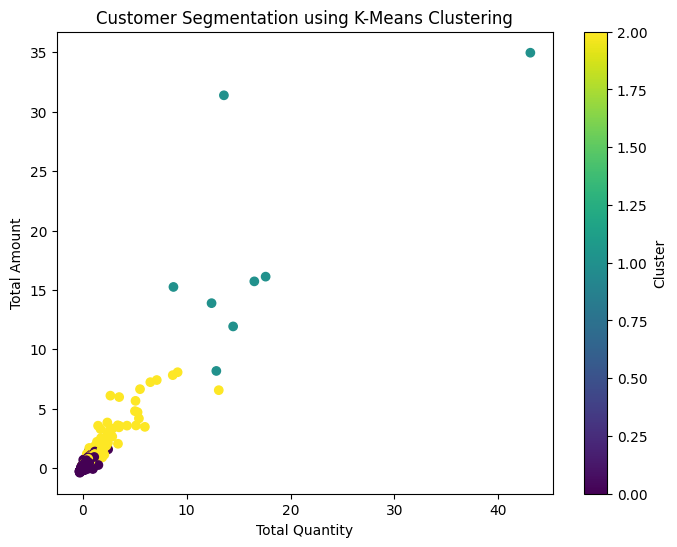

In [121]:
plt.figure(figsize=(8, 6))
plt.scatter(clustered_data['TotalQuantity'], clustered_data['TotalAmount'], c=clustered_data['Cluster'])
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Total Quantity')
plt.ylabel('Total Amount')
plt.colorbar(label='Cluster')
plt.show()

#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

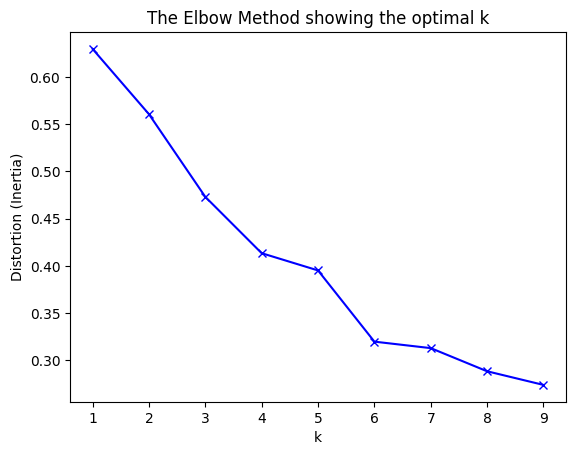

In [123]:
# YOUR CODE HERE
from scipy.spatial.distance import cdist
X = scaled_train_df[['TotalQuantity', 'TotalAmount', 'TransactionCount']].values

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)
    #distortions.append(kmeanModel.inertia_)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion (Inertia)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [124]:
# YOUR CODE HERE
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_train_df[['TotalQuantity', 'TotalAmount', 'TransactionCount']])

scaled_train_df['DBSCluster'] = dbscan_clusters

print("DBSCAN Clustered Data with Labels:")
dbscan_clusters =scaled_train_df["DBSCluster"].unique()
for cluster in dbscan_clusters:
    print(f"\nCluster {cluster}:")
    print(clustered_data[clustered_data["Cluster"] == cluster].head(10))

DBSCAN Clustered Data with Labels:

Cluster 0:
            TotalAmount  TransactionCount  TotalQuantity  Cluster
CustomerID                                                       
12347.0        0.320112          0.234310       0.335367        0
12348.0       -0.039335         -0.101490       0.298172        0
12349.0       -0.065086         -0.437290      -0.097485        0
12350.0       -0.197326         -0.437290      -0.199083        0
12352.0       -0.067145          0.346244      -0.133681        0
12353.0       -0.235365         -0.437290      -0.244515        0
12354.0       -0.097631         -0.437290      -0.119702        0
12355.0       -0.201028         -0.437290      -0.217056        0
12356.0        0.087229         -0.213423       0.130174        0
12357.0        0.585656         -0.437290       0.403764        0

Cluster -1:
Empty DataFrame
Columns: [TotalAmount, TransactionCount, TotalQuantity, Cluster]
Index: []


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

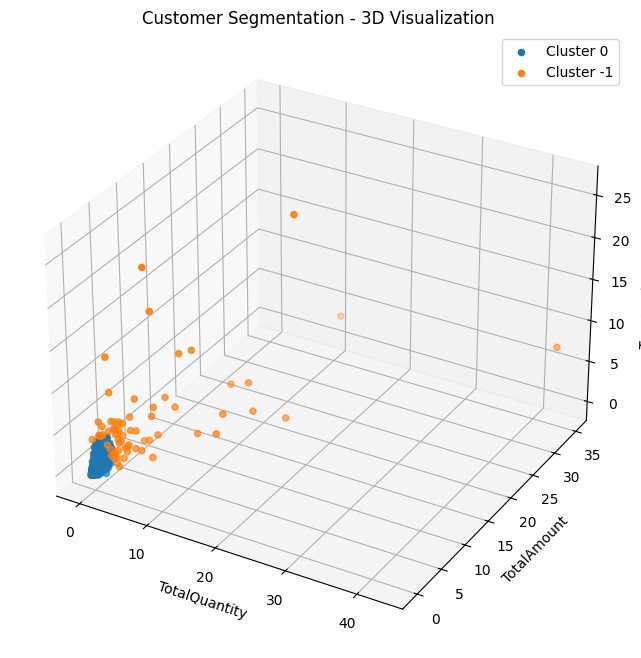

In [126]:
# YOUR CODE HERE
x_feature = 'TotalQuantity'
y_feature = 'TotalAmount'
z_feature = 'TransactionCount'

clusters = scaled_train_df['DBSCluster'].unique()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in clusters:
    cluster_data = scaled_train_df[scaled_train_df['DBSCluster'] == cluster]
    ax.scatter(cluster_data[x_feature], cluster_data[y_feature], cluster_data[z_feature], label=f'Cluster {cluster}')

ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.set_title('Customer Segmentation - 3D Visualization')
ax.legend()
plt.show()

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [127]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

features = clustered_data[['TotalQuantity', 'TotalAmount', 'TransactionCount']]
labels = clustered_data['Cluster']
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(f"Precision: {precision_score(y_val, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_val, y_pred, average='weighted')}")
print(f"F1-score: {f1_score(y_val, y_pred, average='weighted')}")

Accuracy: 0.9976905311778291
Precision: 0.9982692812988342
Recall: 0.9976905311778291
F1-score: 0.9978448417019868


### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [129]:
# YOUR CODE HERE
test_features = scaled_test_df[['TotalQuantity', 'TotalAmount', 'TransactionCount']]
predicted_labels = model.predict(test_features)
scaled_test_df['PredictedCluster'] = predicted_labels
predicted_clusters = scaled_test_df['PredictedCluster'].unique()

for cluster in predicted_clusters:
    print(f"\nCluster {cluster}:")
    print(scaled_test_df[scaled_test_df['PredictedCluster'] == cluster].head(10))


Cluster 0:
            TotalAmount  TransactionCount  TotalQuantity      Country  \
CustomerID                                                              
12347.0        0.550233          0.624587       0.396165      Iceland   
12349.0       -0.092037         -0.395474      -0.296620        Italy   
12354.0       -0.296170         -0.395474      -0.327410        Spain   
12355.0        0.319197         -0.395474       0.457746      Bahrain   
12356.0        0.179877         -0.395474      -0.019506     Portugal   
12357.0        0.513896         -0.395474       0.196027  Switzerland   
12358.0        0.220931         -0.395474      -0.235039      Austria   
12359.0        0.376847          0.012551       0.103656       Cyprus   
12360.0       -0.181744         -0.191461      -0.204248      Austria   
12362.0        0.529051          1.032611       0.219120      Belgium   

            PredictedCluster  
CustomerID                    
12347.0                    0  
12349.0           

### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?